# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the Network dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install tensorflow
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, LCO
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_Network_dataset/train_test_network.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('train_test_network.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 50)         │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4992 - loss: 0.6946 - val_accuracy: 0.7317 - val_loss: 0.6921
Epoch 2/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5007 - loss: 0.6942 - val_accuracy: 0.8348 - val_loss: 0.6909
Epoch 3/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5043 - loss: 0.6938 - val_accuracy: 0.8355 - val_loss: 0.6883
Epoch 4/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5072 - loss: 0.6935 - val_accuracy: 0.8323 - val_loss: 0.6857
Epoch 5/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5080 - loss: 0.6933 - val_accuracy: 0.8354 - val_loss: 0.6843
Epoch 6/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.5099 - loss: 0.6929 - val_accuracy: 0.8330 - val_loss: 0.6813
Epoch 7/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5133 - loss: 0.6925 - val_accuracy: 0.8354 - val_loss: 0.6798
Epoch 8/70
4024/4024 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.5176 - loss: 0

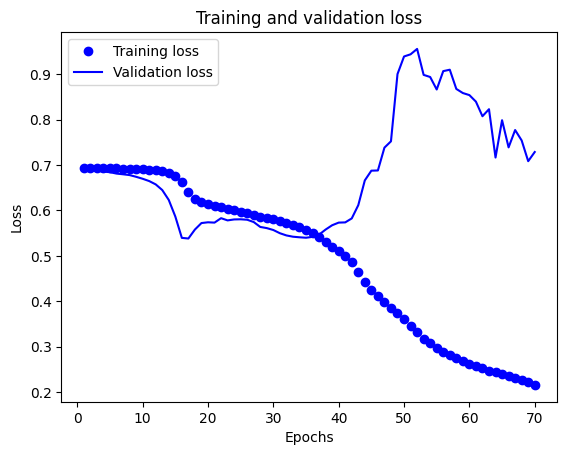

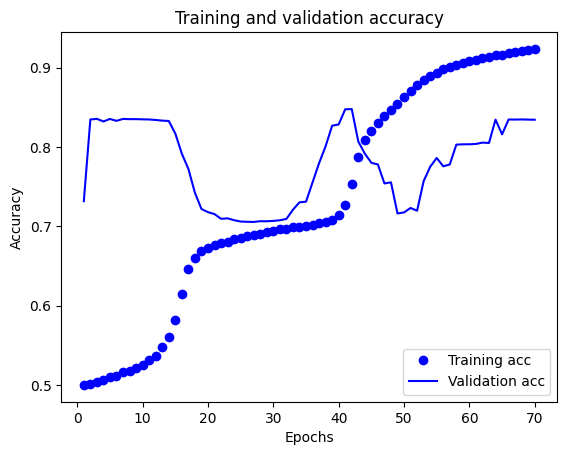


Classification Report
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      4943
           1       0.86      0.94      0.90     16161

    accuracy                           0.84     21104
   macro avg       0.79      0.72      0.74     21104
weighted avg       0.83      0.84      0.83     21104


Confusion Matrix
[[ 2506  2437]
 [ 1017 15144]]


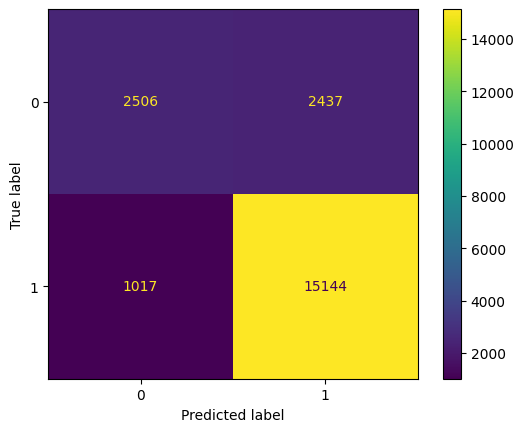

Time taken: 1468.0866 seconds


In [ ]:
start_time_1 = time.perf_counter()
# with tensorflow.device('/device:GPU:0'):
# CNN model detection
# https://keras.io/api/layers/activations/#softmax-function
detection_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
    tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
    tensorflow.keras.layers.MaxPooling1D(pool_size=2),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.LSTM(64),
    tensorflow.keras.layers.Flatten(),
    # 1 layer
    tensorflow.keras.layers.Dense(512, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    # either attack or normal
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])
detection_model.summary()
# https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
detection_model.compile(optimizer=sgd,
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

# Make predictions
prediction = detection_model.predict(X_test_encode)
print(prediction)
attack_prediction = numpy.where(prediction > 0.5, 1, 0)
print(attack_prediction)
print(y_test)

# Evaluate the model
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
# https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
history_dict = history.history
# print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("\n")

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

print("\nClassification Report")
print(classification_report(y_test, attack_prediction))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, attack_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units

The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/12 10:18:40 AM, INFO, mealpy.human_based.LCO.OriginalLCO: Solving single objective optimization problem.


Accuracy 0.7585406303405762
Accuracy 0.28727787733078003
Accuracy 0.027813315391540527
Accuracy 0.16564792394638062
Accuracy 0.3237147331237793
Accuracy 0.09822314977645874
Accuracy 0.31637054681777954
Accuracy 0.3282160758972168
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.0651504397392273
Accuracy 0.23762142658233643
Accuracy 0.7585406303405762
Accuracy 0.07690119743347168
Accuracy 0.11362236738204956
Accuracy 0.0959962010383606
Accuracy 0.22264868021011353
Accuracy 0.22928214073181152
Accuracy 0.21743661165237427
Accuracy 0.09272682666778564
Accuracy 0.03198295831680298
Accuracy 0.04624497890472412
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.08737266063690186
Accuracy 0.7585406303405762
Accuracy 0.04861408472061157
Accuracy 0.03980100154876709
Accuracy 0.0651504397392273
Accuracy 0.01975834369659424
Accuracy 0.2597488760948181
Accuracy 0.24145936965942383
Accuracy 0.09367448091506958
Accuracy 0.24055910110473633
Accuracy 0.0302771925926

2025/04/12 02:37:33 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 1, Current best: 0.01975834369659424, Global best: 0.01975834369659424, Runtime: 8290.71663 seconds


Accuracy 0.12963753938674927
Accuracy 0.06240224838256836
Accuracy 0.07633262872695923
Accuracy 0.0720682144165039
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.29035770893096924
Accuracy 0.08561950922012329
Accuracy 0.09149491786956787
Accuracy 0.08187633752822876
Accuracy 0.18834400177001953
Accuracy 0.7585406303405762
Accuracy 0.09992891550064087
Accuracy 0.08922058343887329
Accuracy 0.1685856580734253
Accuracy 0.24145936965942383
Accuracy 0.09827053546905518
Accuracy 0.24145936965942383
Accuracy 0.1670694351196289
Accuracy 0.24145936965942383


2025/04/12 05:00:19 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 2, Current best: 0.01975834369659424, Global best: 0.01975834369659424, Runtime: 8565.50441 seconds


Accuracy 0.24145936965942383
Accuracy 0.07382136583328247
Accuracy 0.05576878786087036
Accuracy 0.0616915225982666
Accuracy 0.0335465669631958
Accuracy 0.24145936965942383
Accuracy 0.10438287258148193
Accuracy 0.7585406303405762
Accuracy 0.0560530424118042
Accuracy 0.3756929636001587
Accuracy 0.08429282903671265
Accuracy 0.3164653182029724
Accuracy 0.1669272780418396
Accuracy 0.7585406303405762
Accuracy 0.04273867607116699
Accuracy 0.7585406303405762
Accuracy 0.08287137746810913
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.17128640413284302


2025/04/12 07:32:03 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 3, Current best: 0.01975834369659424, Global best: 0.01975834369659424, Runtime: 9104.11445 seconds


Accuracy 0.2775171995162964
Accuracy 0.07661694288253784
Accuracy 0.09902864694595337
Accuracy 0.046671390533447266
Accuracy 0.34195685386657715
Accuracy 0.24145936965942383
Accuracy 0.08850985765457153
Accuracy 0.21061360836029053
Accuracy 0.7585406303405762
Accuracy 0.13892441987991333
Accuracy 0.32741057872772217
Accuracy 0.03728973865509033
Accuracy 0.05249941349029541
Accuracy 0.7585406303405762
Accuracy 0.111869215965271
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762


2025/04/12 10:11:35 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 4, Current best: 0.01975834369659424, Global best: 0.01975834369659424, Runtime: 9572.01842 seconds


Accuracy 0.2984126806259155
Accuracy 0.0879412293434143
Accuracy 0.0747690200805664
Accuracy 0.02530205249786377
Accuracy 0.23866385221481323
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.08438760042190552
Accuracy 0.03781092166900635
Accuracy 0.7585406303405762
Accuracy 0.05809050798416138
Accuracy 0.10168206691741943
Accuracy 0.3155650496482849
Accuracy 0.10604119300842285
Accuracy 0.2389954924583435
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.08675670623779297
Accuracy 0.11878699064254761
Accuracy 0.31537550687789917


2025/04/13 12:36:26 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 5, Current best: 0.01975834369659424, Global best: 0.01975834369659424, Runtime: 8690.78132 seconds


Accuracy 0.1062307357788086
Accuracy 0.08182895183563232
Accuracy 0.028239727020263672
Accuracy 0.2899312973022461
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.05894339084625244
Accuracy 0.04098552465438843
Accuracy 0.12769484519958496
Accuracy 0.07628524303436279
Accuracy 0.08557212352752686
Accuracy 0.17303955554962158
Accuracy 0.02501779794692993
Accuracy 0.09405356645584106
Accuracy 0.12253022193908691
Accuracy 0.10395640134811401
Accuracy 0.08661454916000366
Accuracy 0.08111822605133057
Accuracy 0.11992418766021729
Accuracy 0.33285951614379883


2025/04/13 03:05:06 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 6, Current best: 0.019474029541015625, Global best: 0.019474029541015625, Runtime: 8919.77834 seconds


Accuracy 0.019474029541015625
Accuracy 0.11314857006072998
Accuracy 0.7585406303405762
Accuracy 0.11935561895370483
Accuracy 0.14977490901947021
Accuracy 0.07870173454284668
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.03691071271896362
Accuracy 0.18109452724456787
Accuracy 0.09144753217697144
Accuracy 0.7585406303405762
Accuracy 0.08263444900512695
Accuracy 0.06932008266448975
Accuracy 0.2389954924583435
Accuracy 0.022174835205078125
Accuracy 0.05647951364517212
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.10206115245819092


2025/04/13 05:31:42 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 7, Current best: 0.019474029541015625, Global best: 0.019474029541015625, Runtime: 8796.46678 seconds


Accuracy 0.19493013620376587
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.017815709114074707
Accuracy 0.03425729274749756
Accuracy 0.09206348657608032
Accuracy 0.024543941020965576
Accuracy 0.24145936965942383
Accuracy 0.07950723171234131
Accuracy 0.07254207134246826
Accuracy 0.3176024556159973
Accuracy 0.03719496726989746
Accuracy 0.05013030767440796
Accuracy 0.0859038233757019
Accuracy 0.07979154586791992
Accuracy 0.08723050355911255
Accuracy 0.037479281425476074
Accuracy 0.7585406303405762
Accuracy 0.02402275800704956
Accuracy 0.11712867021560669


2025/04/13 08:29:11 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 8, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 10649.26581 seconds


Accuracy 0.24145936965942383
Accuracy 0.24145936965942383
Accuracy 0.0897417664527893
Accuracy 0.12030327320098877
Accuracy 0.24131721258163452
Accuracy 0.1304430365562439
Accuracy 0.03065621852874756
Accuracy 0.06837242841720581
Accuracy 0.24145936965942383
Accuracy 0.07969677448272705
Accuracy 0.04643452167510986
Accuracy 0.24117505550384521
Accuracy 0.11153757572174072
Accuracy 0.089599609375
Accuracy 0.24145936965942383
Accuracy 0.05249941349029541
Accuracy 0.0569533109664917
Accuracy 0.01871591806411743
Accuracy 0.7585406303405762
Accuracy 0.15531861782073975


2025/04/13 10:59:28 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 9, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 9016.34519 seconds


Accuracy 0.2409381866455078
Accuracy 0.08855724334716797
Accuracy 0.08614075183868408
Accuracy 0.08789384365081787
Accuracy 0.11025822162628174
Accuracy 0.021985292434692383
Accuracy 0.07950723171234131
Accuracy 0.10784173011779785
Accuracy 0.09211087226867676
Accuracy 0.24145936965942383
Accuracy 0.1428571343421936
Accuracy 0.1212034821510315
Accuracy 0.03335702419281006
Accuracy 0.07292109727859497
Accuracy 0.08405590057373047
Accuracy 0.24145936965942383
Accuracy 0.08661454916000366
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383


2025/04/13 02:10:43 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 10, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 11475.19692 seconds


Accuracy 0.7585406303405762
Accuracy 0.08069175481796265
Accuracy 0.08865195512771606
Accuracy 0.05894339084625244
Accuracy 0.07979154586791992
Accuracy 0.04889833927154541
Accuracy 0.08661454916000366
Accuracy 0.07424783706665039
Accuracy 0.09443259239196777
Accuracy 0.7585406303405762
Accuracy 0.09538024663925171
Accuracy 0.09248995780944824
Accuracy 0.0729684829711914
Accuracy 0.7585406303405762
Accuracy 0.09267944097518921
Accuracy 0.24145936965942383
Accuracy 0.077564537525177
Accuracy 0.09561717510223389
Accuracy 0.24145936965942383
Accuracy 0.08988392353057861


2025/04/13 05:11:10 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 11, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 10827.16475 seconds


Accuracy 0.11305379867553711
Accuracy 0.060080528259277344
Accuracy 0.08301347494125366
Accuracy 0.049277424812316895
Accuracy 0.07491117715835571
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762
Accuracy 0.08377164602279663
Accuracy 0.23672115802764893
Accuracy 0.07112056016921997
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.24145936965942383
Accuracy 0.07007819414138794
Accuracy 0.24145936965942383
Accuracy 0.09381663799285889
Accuracy 0.24145936965942383
Accuracy 0.7585406303405762
Accuracy 0.07292109727859497


2025/04/13 08:24:54 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 12, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 11623.98955 seconds


Accuracy 0.14612650871276855
Accuracy 0.07818055152893066
Accuracy 0.7585406303405762
Accuracy 0.24145936965942383
Accuracy 0.09083157777786255
Accuracy 0.10296136140823364
Accuracy 0.13072729110717773
Accuracy 0.7585406303405762
Accuracy 0.08235013484954834
Accuracy 0.21416723728179932
Accuracy 0.24145936965942383
Accuracy 0.02113240957260132
Accuracy 0.1885809302330017
Accuracy 0.07320541143417358
Accuracy 0.07794362306594849
Accuracy 0.24103295803070068
Accuracy 0.10428810119628906
Accuracy 0.23833215236663818
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762


2025/04/13 11:04:39 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 13, Current best: 0.017815709114074707, Global best: 0.017815709114074707, Runtime: 9585.46381 seconds


Accuracy 0.08301347494125366
Accuracy 0.10675197839736938
Accuracy 0.012556254863739014
Accuracy 0.07500594854354858
Accuracy 0.0801231861114502
Accuracy 0.7585406303405762
Accuracy 0.08386635780334473
Accuracy 0.07405829429626465
Accuracy 0.3177446126937866
Accuracy 0.014783203601837158
Accuracy 0.2507936358451843
Accuracy 0.09040510654449463
Accuracy 0.12380951642990112
Accuracy 0.7585406303405762
Accuracy 0.07325279712677002
Accuracy 0.0419805645942688
Accuracy 0.04363894462585449
Accuracy 0.0297086238861084
Accuracy 0.23970621824264526
Accuracy 0.7585406303405762


2025/04/14 01:46:21 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 14, Current best: 0.012556254863739014, Global best: 0.012556254863739014, Runtime: 9701.83404 seconds


Accuracy 0.08742004632949829
Accuracy 0.03871119022369385
Accuracy 0.08339256048202515
Accuracy 0.04079604148864746
Accuracy 0.24112766981124878
Accuracy 0.1424781084060669
Accuracy 0.24108028411865234
Accuracy 0.16531628370285034
Accuracy 0.08993130922317505
Accuracy 0.02639186382293701
Accuracy 0.38678038120269775
Accuracy 0.24145936965942383
Accuracy 0.08325040340423584
Accuracy 0.13461267948150635
Accuracy 0.14868515729904175
Accuracy 0.039421916007995605
Accuracy 0.3401089906692505
Accuracy 0.02141672372817993
Accuracy 0.7585406303405762
Accuracy 0.7585406303405762


2025/04/14 04:18:20 AM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 15, Current best: 0.012556254863739014, Global best: 0.012556254863739014, Runtime: 9118.88897 seconds


Accuracy 0.7585406303405762
Solution: [0.19371009 1.40436454 2.40040423 2.04287691 0.25508062], Fitness: 0.012556254863739014
Solution: [0.19371009 1.40436454 2.40040423 2.04287691 0.25508062], Fitness: 0.012556254863739014


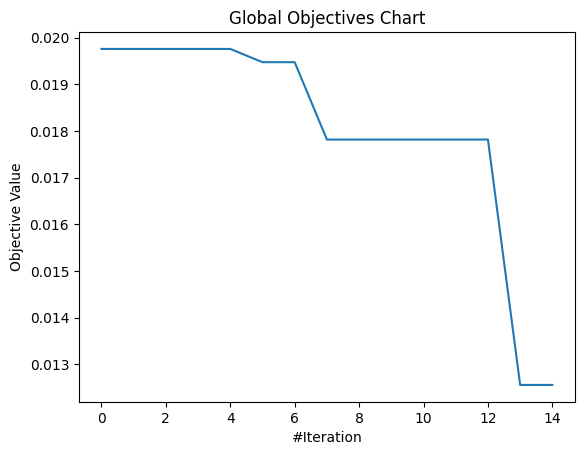

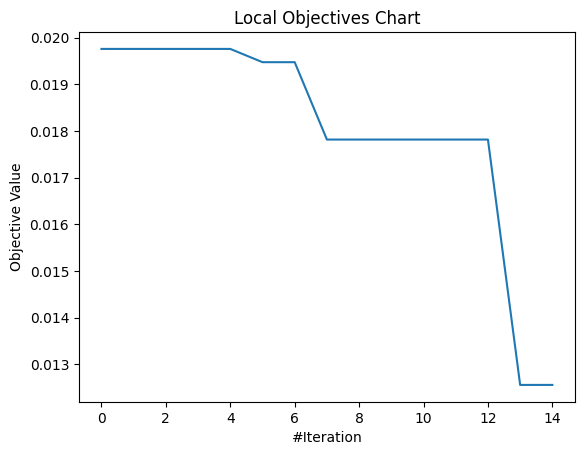

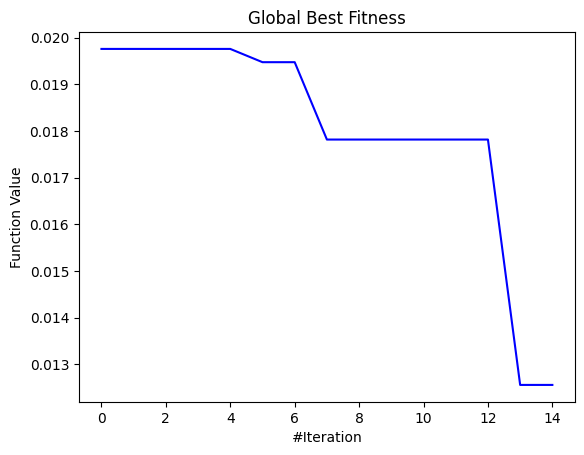

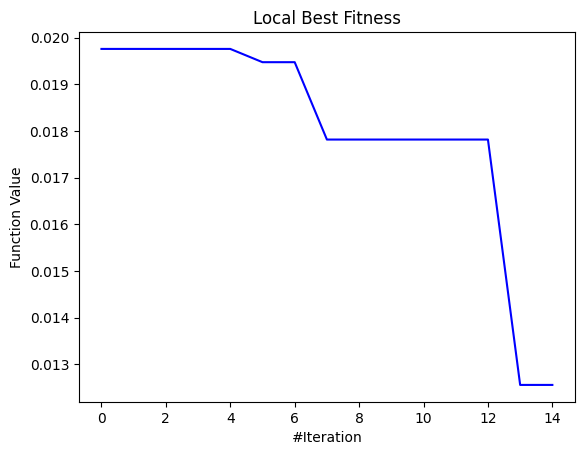

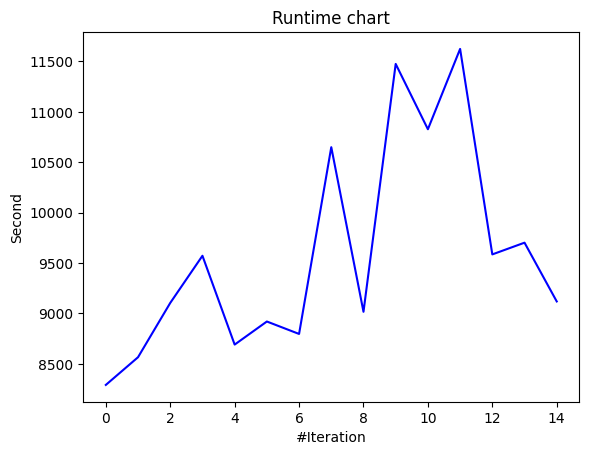

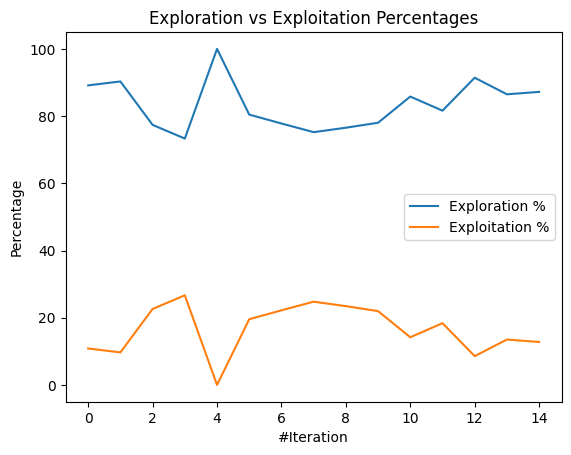

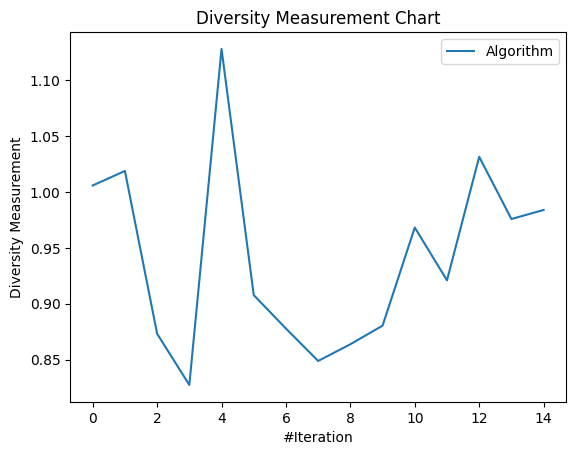

ValueError: Can't draw the trajectory because 'save_population' is set to False or the number of epochs is too small.

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])


#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

#Dense Layer encoder
DENSE_ENCODER = LabelEncoder()
DENSE_ENCODER.fit([5, 8, 10])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = LCO.OriginalLCO(epoch=15, pop_size=20, r1=2.35)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

Solution: [0.19371009 1.40436454 2.40040423 2.04287691 0.25508062], Fitness: 0.012556254863739014

Batch Size - **32**, 64, 128

Activation - softmax, **softplus**, relu, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, **0.005**, 0.01, 0.05, 0.1

Filters - 25, 50, **75**

Hidden Units - **400**, 512, 640

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 75)         │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 75)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 75)         │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │        26,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,841 (245.47 KB)

 Trainable params: 62,691 (244.89 KB)

 Non-trainable params: 150 (600.00 B)

Epoch 1/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.5016 - loss: 0.7321 - val_accuracy: 0.7599 - val_loss: 0.6873
Epoch 2/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5016 - loss: 0.6973 - val_accuracy: 0.2415 - val_loss: 0.6953
Epoch 3/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5003 - loss: 0.6971 - val_accuracy: 0.2415 - val_loss: 0.6998
Epoch 4/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.5001 - loss: 0.6973 - val_accuracy: 0.7585 - val_loss: 0.6721
Epoch 5/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.5012 - loss: 0.6969 - val_accuracy: 0.2415 - val_loss: 0.7259
Epoch 6/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5022 - loss: 0.6971 - val_accuracy: 0.2415 - val_loss: 0.7070
Epoch 7/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5044 - loss: 0.6967 - val_accuracy: 0.7594 - val_loss: 0.6659
Epoch 8/70
8048/8048 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5041 - loss: 0

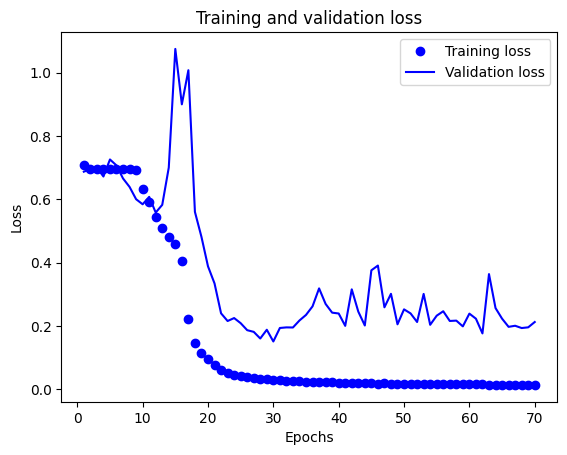

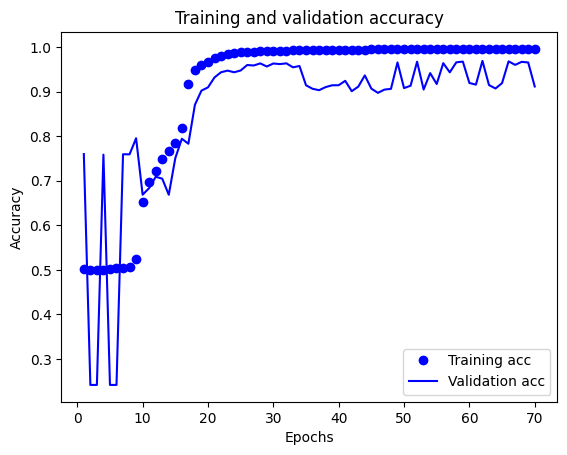


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4943
           1       0.98      1.00      0.99     16161

    accuracy                           0.98     21104
   macro avg       0.98      0.96      0.97     21104
weighted avg       0.98      0.98      0.98     21104


Confusion Matrix
[[ 4592   351]
 [   43 16118]]


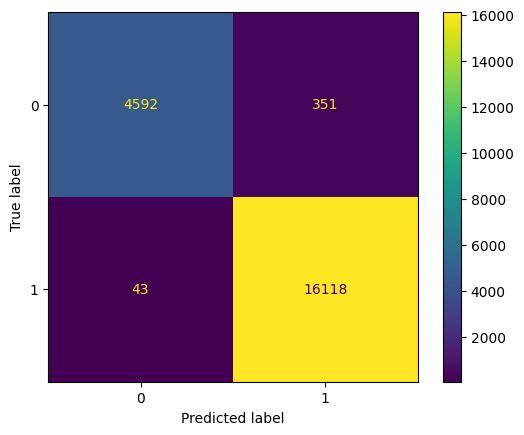

Time taken: 2558.8013 seconds


In [ ]:
start_time_2 = time.perf_counter()
# with tensorflow.device('/device:GPU:0'):
# CNN model detection
# https://keras.io/api/layers/activations/#softmax-function
detection_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
    tensorflow.keras.layers.Conv1D(filters=75, kernel_size=3, activation='sigmoid'),
    tensorflow.keras.layers.MaxPooling1D(pool_size=2),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.LSTM(64),
    tensorflow.keras.layers.Flatten(),
    # 1 layer
    tensorflow.keras.layers.Dense(400, activation='softplus'),
    tensorflow.keras.layers.Dropout(0.5),
    # either attack or normal
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])

detection_model.summary()
# https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.005)
detection_model.compile(optimizer=sgd,
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = detection_model.fit(X_rebalance, y_rebalance, batch_size=32, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

# Make predictions
prediction = detection_model.predict(X_test_encode)
print(prediction)
attack_prediction = numpy.where(prediction > 0.5, 1, 0)
print(attack_prediction)
print(y_test)

# Evaluate the model
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
# https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
history_dict = history.history
# print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("\n")

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

print("\nClassification Report")
print(classification_report(y_test, attack_prediction))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, attack_prediction))
ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")